# KOROKO Abdoulaye ISUP/Sorbonne Université


# Importation des données

In [77]:
data<- read.csv("Qualite-KOROKO.csv",header = T)
head(data)

X,Date,V2,V3,V4,V5,V6,V7,V8,V9,...,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108
1,11884.585,8747.270,8979.165,13134.79,6744.153,332.9116,2.041232,2.526378,1.060004,...,7.716915,8.026644,8.357117,6.549795,7.925176,7.223117,11.690900,6.790898,1.439105,3.087363
2,3967.990,8917.627,8648.866,13196.79,7006.460,6553.8017,1.989004,2.505414,2.569598,...,6.251310,5.809821,11.574662,7.666878,11.133945,11.453752,12.222374,7.723343,2.263309,1.556338
3,2340.014,8542.631,9095.648,13130.64,6217.429,5826.7149,2.182383,2.076135,1.431127,...,7.850298,7.528313,7.928808,5.418660,10.758805,11.026778,8.963434,6.009683,1.144087,2.805724
4,9531.647,8771.683,8852.317,13159.67,5304.473,1370.2957,2.013329,2.273124,1.586606,...,12.348011,7.568170,12.429116,5.717503,10.673237,9.090007,4.577667,8.984262,1.625382,1.137140
5,3744.127,8588.406,8890.939,13175.67,7934.286,10050.1822,1.680108,2.053629,2.491755,...,6.717535,6.395391,6.692789,7.533511,9.097080,5.808258,9.959317,7.830020,1.568269,1.726131
6,11094.191,9024.266,8768.340,13148.79,8417.490,7970.3762,1.806168,2.593747,2.189344,...,7.253159,8.743518,7.510613,4.201367,6.965259,8.566168,7.183211,11.294895,2.303840,2.769589


In [78]:
columns<-names(data)
length(columns)

[1] 109

# 1-) Loi des données pour les colonnes 1 à 6

# a-) Visualisation de la distribution graphique  de chacune des 6 colonnes

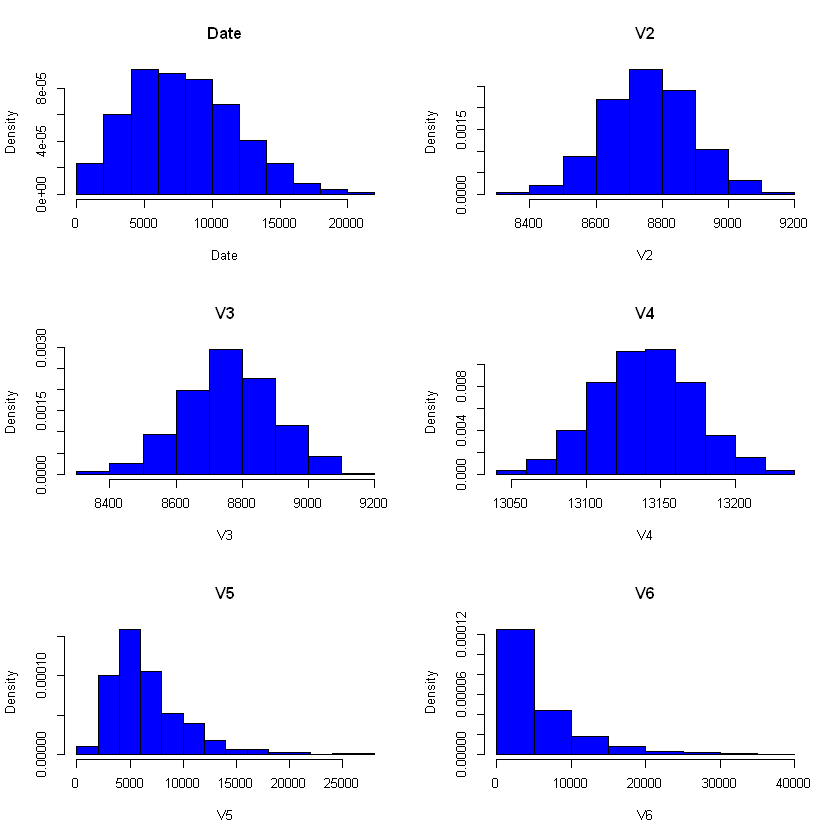

In [79]:
Date=data$Date
V2=data$V2
V3=data$V3
V4=data$V4
V5=data$V5
V6=data$V6
par(mfrow=c(3,2))
hist(Date,probability=T,main="Date",col="blue")
hist(V2,probability=T,main="V2",col="blue")
hist(V3,probability=T,main="V3",col="blue")
hist(V4,probability=T,main="V4",col="blue")
hist(V5,probability=T,main="V5",col="blue")
hist(V6,probability=T,main="V6",col="blue")


La visualisation nous permet d'avoir une idée de la possible loi de chacune des colonnes. Dans la suite je déterminerai précisement ces lois à travers les tests graphiques et théoriques d'adéquation. J'implémenterai moi même les tests de Kolmogorov-Sirnov et d'Anderson-Darling et ensuite comparerai les résultas par rapport aux résultats des tests déja existants dans R.

# Le test d'adéquation de Kolmogorov-Smirnov  
Soit $X=(X_1,X_2,...,X_n)$ un échantillon de loi inconnu P continue par rapport à la mésure de Lebesgue et de fonction de répartition $F$. Soit $F_0$ la fonction de répartion d'une loi connue, continue sur $\mathbb{R}$.  
On souhaite tester : $H_0:F=F_0$ vs $H_1:F\ne F_0$  
On considère la statistique de test $T(X)=n^{1/2}sup_{t\in \mathbb{R}}|F_n(t)-F_0(t)|$ avec $F_n(t)=\frac{1}{n}\sum_{i=1}^{n}\mathbb{1}_{\{X_i\le t\}}$ la fonction de répartition empirique associée à l'échantillon $X=(X_1,...,X_n)$. On montre que $T(X)=n^{1/2}max_{1\le k\le n}(max\{\frac{k}{n}-F_0(X_{(k)}),F_0(X_{(k)})- \frac{k-1}{n} \})$ avec $X_{(1)}\le X_{(2)}\le ....\le X_{(n)}$ la statistique d'ordre associé à l'échantilon X.  
La zone de rejet est donnée par $\{T(X)\ge c_{\alpha} \}$ où $d_{\alpha}$ est le quantile d'orde $1-\alpha$ de la loi de $L_{KS}(n)=n^{1/2}sup_{x \in [0;1]}|\frac{1}{n}\sum_{i=1}^{n}\mathbb{1}_{(U_i\le x)}-x|$ avec $U_1,...,U_n$ iid ~ $\mathbb{U}([0;1])$. On montre que $d_{\alpha}=\sqrt{\frac{-log(\alpha /2)}{2}}$ et la p-value vaut $2e^{-2(T(X))^2}$


In [80]:
Kolmogorov_Smirnov<-function(data,alpha=0.05,cible="normal"){
    n<-length(data)
    sorted_data=sort(data)
    T=c()
    if(cible=="normal"){
        for(k in 1:n){
            T=c(T,max((k/n)-pnorm(sorted_data[k],mean(data),sd(data)),
                pnorm(sorted_data[k],mean(data),sd(data))-((k-1)/n)))
    }
        
    }
    if(cible=="exponential"){
        for(k in 1:n){
            T=c(T,max((k/n)-pexp(sorted_data[k],rate=1/mean(data)),
                pexp(sorted_data[k],rate=1/mean(data))-((k-1)/n)))
    }
        
    }
    if(cible=="gamma"){
        a=(mean(data))^(2)/var(data)
        b=mean(data)/var(data)
        for(k in 1:n){
            T=c(T,max((k/n)-pgamma(sorted_data[k],a,b),
                pgamma(sorted_data[k],a,b)-((k-1)/n)))
    }
        
    }
    if(cible=="weibull"){
        #install.packages("weibullness") # For estimation of weibull parameters
        library(weibullness) 
        parameters=weibull.mle(data, threshold=0)
        shape=parameters$shape
        scale=parameters$scale
        for(k in 1:n){
            T=c(T,max((k/n)-pweibull(sorted_data[k],shape,scale),
                      pweibull(sorted_data[k],shape,scale)-((k-1)/n)))
    }
        
    }
    
    D=sqrt(n)*max(T)
    p_value=2*exp(-2*D^2)
    d_alpha=sqrt(-log(alpha/2))/2
    result=list(statistic=D/sqrt(n),p_value=p_value,d_alpha=d_alpha/sqrt(n))
    return (result)
    
}

In [81]:
Kolmogorov_Smirnov(Date,alpha=0.05,cible="weibull")

$statistic
[1] 0.02180534

$p_value
[1] 0.7727508

$d_alpha
[1] 0.03036807

# Le test de normalité d'Anderson-Darling  
Le test d’Anderson-Darling est une approche non paramétrique permettant de tester si une variable continue X suit une loi normale. Soit $X=(X_1,X_2,...,X_n)$ un échantillon de loi inconnue P continue par rapport à la mésure de Lebesgue et de fonction de répartition $F$. Soit $F_0$ et $f_0$ les fonctions de répartion et de densité d'une loi normale $\mathbf{N}(\mu,\sigma^2)$.Si $\mu$ et $\sigma^2$ sont incounnus, alors ils sont estimés à travers les données.
On souhaite tester : $H_0:F=F_0$ vs $H_1:F\ne F_0$   
On utilise la statistique $A_{n}^{0}(X)=n\int_{\mathbb{R}} (F_n(t)-F_0(t))^2 \frac{f_0(t)}{F_0(t)(1-F_0(t))}dt=-n-\sum_{i=1}^{n}\frac{2i-1}{n}[ln(F_0(X_{(i)}))+ln(1-F_0(X_{n+1-i}))]$  
La fonction test est definie par $\phi(x)=\mathbb{1}_{A_{n}^{0}(x)\ge s}$. La valeur
critique s est à lire dans les tables d' Anderson-Darling.
Afin de déterminer la p-valeur associée à la statistique de test $A_{n}^{0}$ il faut appliquer une transformation $A^*=(1+\frac{0.75}{n} +\frac{2.25}{n^2})A_{n}^{0}$. L’une des façon de calculer la p-valeur associée à $A ^*$ est l’algorithme suivant:  
![Kitten](p_value_Anderson.PNG "Fig ")   

**Source pour la méthode de calcul des p-value:** https://lemakistatheux.wordpress.com/2013/08/02/le-test-danderson-darling/



In [82]:
Anderson_Darling<-function(data,alpha=0.05){
    n<-length(data)
    mu=mean(data)
    sigma=sd(data)
    X=sort(data)
    A=0
    for(i in 1:n){
        A=A+((2*i-1)/n)*(log(pnorm(X[i],mu,sigma))+log(1-pnorm(X[n+1-i],mu,sigma)))
    }
    A=-n-A
    A_s=(1+(0.75/n)+(2.25/n^2))*A
    if(A_s<0.2){
        p_value=1-exp(-13.436+101.14*A_s-223.73*A_s^2)
    }
    if(A_s>=0.2 && A_s<0.34){
        p_value=1-exp(-8.318+42.796*A_s-59.936*A_s^2)
    }
    if(A_s>=0.34 && A_s<0.6){
        p_value=exp(0.9177-4.279*A_s-1.38*A_s^2)
    }
    if(A_s>=0.6 && A_s<10){
        p_value=exp(1.2937-5.709*A_s+0.0186*A_s^2)
    }
    if(A_s>=10){
        p_value=10^(-4)
    }
    result<-list(statistic=A,p_value=p_value)
    return(result)
}

In [83]:
Anderson_Darling(log(V5),alpha=0.05)

$statistic
[1] 0.3576126

$p_value
[1] 0.453652

# b) Loi de la colonne Date

[1] "test de Kolmogorov existant dans R:"

	One-sample Kolmogorov-Smirnov test

data:  Date
D = 0.021805, p-value = 0.7286
alternative hypothesis: two-sided

[1] "Mon implémentation de Kolmogorov:"
$statistic
[1] 0.02180534

$p_value
[1] 0.7727508

$d_alpha
[1] 0.03036807



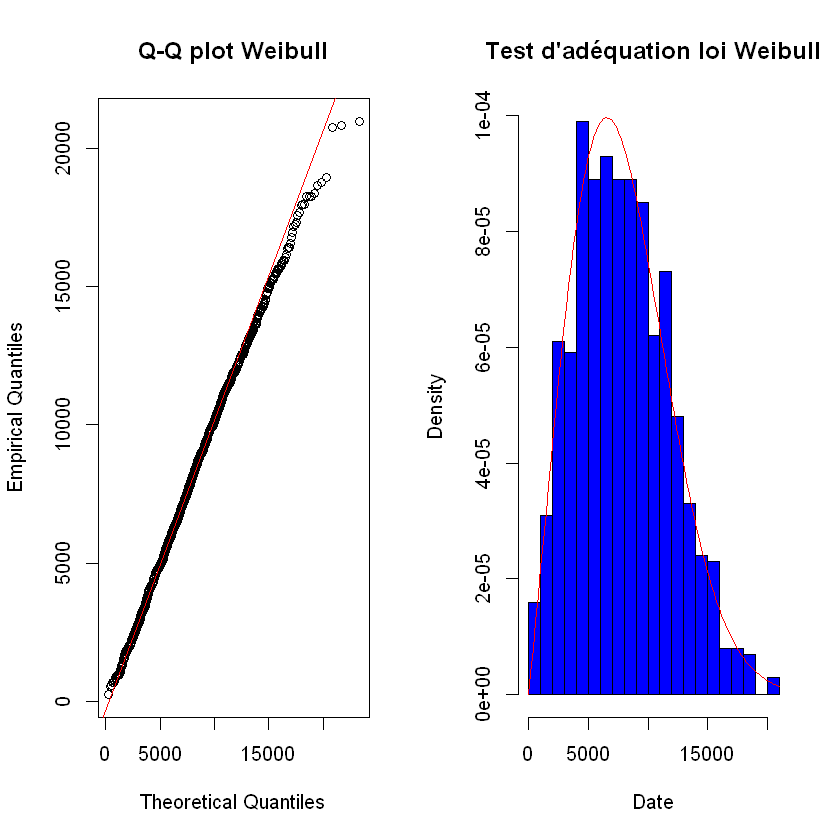

In [84]:
Date=data$Date
library(weibullness) 
parameters=weibull.mle(Date, threshold=0)
shape=parameters$shape
scale=parameters$scale
par(mfrow=c(1,2))
require(graphics)
#qqplot
dist= qweibull(ppoints(length(Date)), shape=shape,scale=scale)
qqplot(dist, Date, xlab = 'Theoretical Quantiles', ylab = 'Empirical Quantiles',
       main = 'Q-Q plot Weibull')
qqline(Date, distribution = function(p) qweibull(p, shape=shape,scale=scale), col = 2)
#Superposition de l'histogramme et de la densité de loi de Weibull
hist(Date,probability=T,col="blue",breaks=25,main="Test d'adéquation loi Weibull")
curve(dweibull(x,shape,scale),col="red",add=T)
ks<-ks.test(Date,"pweibull",shape=shape,scale=scale)
print("test de Kolmogorov existant dans R:")
print(ks)
my_test=Kolmogorov_Smirnov(Date,alpha=0.05,cible="weibull")
print("Mon implémentation de Kolmogorov:")
print(my_test)
       

Grace aux tests graphiques et au test de Kolomogorov-Sirnov, l'on peut conclure que les données de la colonne Date suivent une loi de Weibull de paramètres estimés à travers les données. On rappelle qu'une variable aléatoire suit une loi de Weibull de paramètre $a$ et $b$ si sa densité est $f(x)=\frac{a}{b}(\frac{x}{b})^{a-1}e^{-(\frac{x}{b})^a}\mathbb{1}_{x\ge0}$. J'ai utilisé le package de R **weibullness** pour l'estimation de a et b. Par ailleurs, Gumbel a proposé une estimation des paramètres a et b à travers la demarche suivante. Soit $X=(X_1,...,X_n)$ un n-échantillon iid de loi de Weibull, alors des estimateurs de a et b sont:  
$\hat{a}=\frac{\pi}{\sqrt{6}}\sigma(log(X))$ et $\hat{b}=exp(\frac{0.5772}{\hat{a}}+\bar{log(X)}$ où $\sigma$ désigne l'application qui à une donnée X associe son écart-type.

# c) Loi de la colonne V2

[1] "tests existant dans R:"

	Shapiro-Wilk normality test

data:  V2
W = 0.99888, p-value = 0.806


	One-sample Kolmogorov-Smirnov test

data:  V2
D = 0.015742, p-value = 0.9653
alternative hypothesis: two-sided


	Anderson-Darling normality test

data:  V2
A = 0.24979, p-value = 0.7447

[1] "Mes tests implémentés:"
[1] "Test d'Anderson Darling"
$statistic
[1] 0.249788

$p_value
[1] 0.7446983

[1] "Test de Kolmogorov-Smirnov"
$statistic
[1] 0.01574239

$p_value
[1] 1.218355

$d_alpha
[1] 0.03036807



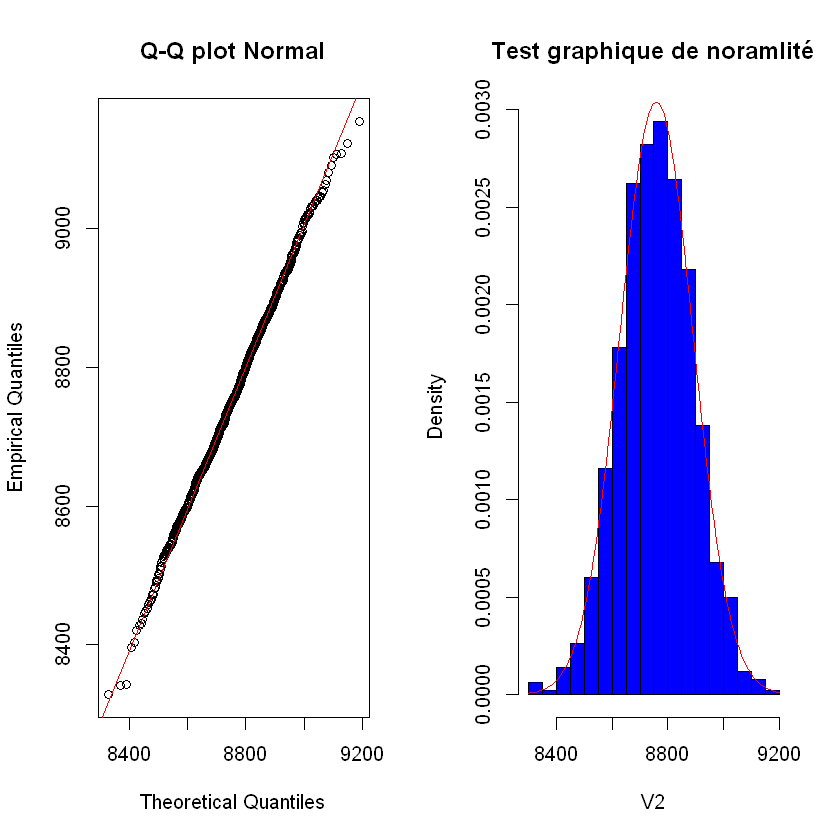

In [85]:
V2=data$V2
par(mfrow=c(1,2))
require(graphics)
#qqplot
dist= qnorm(ppoints(length(V2)), mean=mean(V2),sd=sd(V2))
qqplot(dist, V2, xlab = 'Theoretical Quantiles', ylab = 'Empirical Quantiles',
       main = 'Q-Q plot Normal')
qqline(V2, distribution = function(p) qnorm(p, mean=mean(V2),sd=sd(V2)),col=2)
# Superposition de l'histogramme et de la densité de loi normale
hist(V2,probability=T,col="blue",breaks=25,main="Test graphique de noramlité")
curve(dnorm(x,mean(V2),sd(V2)),col="red",add=T)
#Les tests théoriques d'adéquation
library(stats)
library(nortest)
print("tests existant dans R:")
Shapiro<-shapiro.test(V2)
ks<-ks.test(V2,"pnorm",mean=mean(V2), sd=sd(V2))
Anderson<-ad.test(V2)
print(Shapiro)
print(ks)
print(Anderson)
print("Mes tests implémentés:")
print("Test d'Anderson Darling")
print(Anderson_Darling(V2,alpha=0.05))
print("Test de Kolmogorov-Smirnov")
print(Kolmogorov_Smirnov(V2,alpha=0.05,cible="normal"))


Grace aux tests graphiques et théoriques d'adéquation, nous concluons que la loi des données de la colonne V2 est la loi normale de moyenne et variance les moyenne et variance empiriques des données

# d) Loi de la colonne V3


	Shapiro-Wilk normality test

data:  V3
W = 0.99764, p-value = 0.1633


	One-sample Kolmogorov-Smirnov test

data:  V3
D = 0.020838, p-value = 0.778
alternative hypothesis: two-sided


	Anderson-Darling normality test

data:  V3
A = 0.42415, p-value = 0.3175

[1] "Mes tests implémentés:"
[1] "Test d'Anderson Darling"
$statistic
[1] 0.4241506

$p_value
[1] 0.3175098

[1] "Test de Kolmogorov-Smirnov"
$statistic
[1] 0.0208376

$p_value
[1] 0.8392355

$d_alpha
[1] 0.03036807



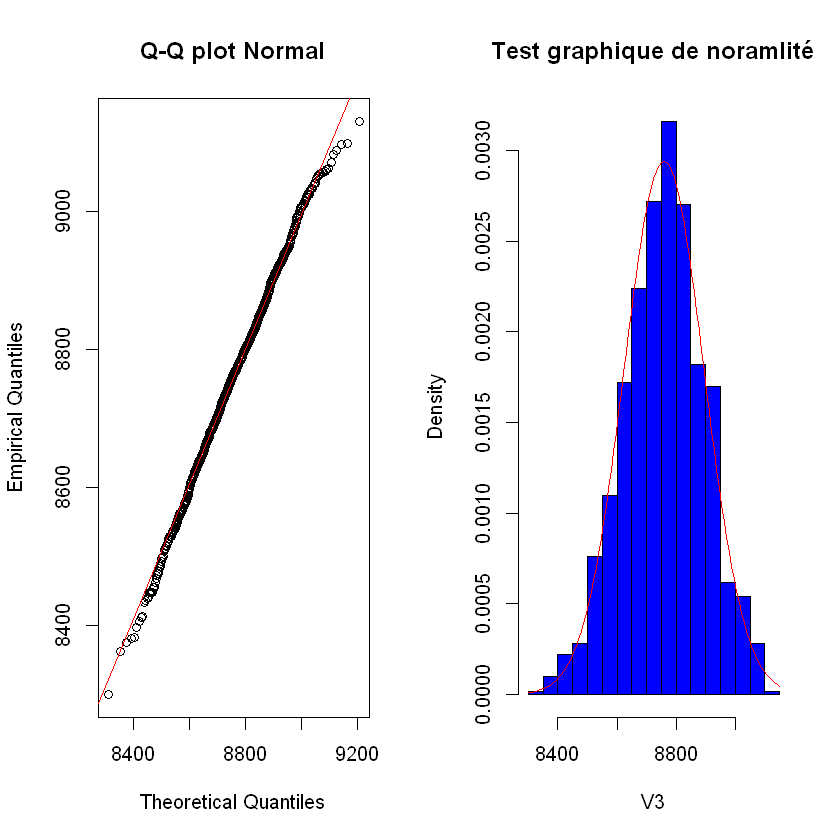

In [86]:
V3=data$V3
par(mfrow=c(1,2))
require(graphics)
#qqplot
dist= qnorm(ppoints(length(V3)), mean=mean(V3),sd=sd(V3))
qqplot(dist, V3, xlab = 'Theoretical Quantiles', ylab = 'Empirical Quantiles',
       main = 'Q-Q plot Normal')
qqline(V3, distribution = function(p) qnorm(p, mean=mean(V3),sd=sd(V3)),col=2)
# Superposition de l'histogramme et de la densité de loi normale
hist(V3,probability=T,col="blue",breaks=25,main="Test graphique de noramlité")
curve(dnorm(x,mean(V3),sd(V3)),col="red",add=T)
#Les tests théoriques d'adéquation
library(stats)
library(nortest)
Shapiro<-shapiro.test(V3)
ks<-ks.test(V3,"pnorm",mean=mean(V3), sd=sd(V3))
Anderson<-ad.test(V3)
print(Shapiro)
print(ks)
print(Anderson)

print("Mes tests implémentés:")
print("Test d'Anderson Darling")
print(Anderson_Darling(V3,alpha=0.05))
print("Test de Kolmogorov-Smirnov")
print(Kolmogorov_Smirnov(V3,alpha=0.05,cible="normal"))


Les graphiques et les différents tests d'adéquation nous permettent de déduire que les données de la colonne V3 sont distribuées selon la loi normale de moyenne la moyenne empirique des données et de variance la variance empirique des données.

# e) Loi de la colonne V4


	Shapiro-Wilk normality test

data:  V4
W = 0.99874, p-value = 0.7173


	One-sample Kolmogorov-Smirnov test

data:  V4
D = 0.01914, p-value = 0.8573
alternative hypothesis: two-sided


	Anderson-Darling normality test

data:  V4
A = 0.22472, p-value = 0.8218

[1] "Mes tests implémentés:"
[1] "Test d'Anderson Darling"
$statistic
[1] 0.2247164

$p_value
[1] 0.8218224

[1] "Test de Kolmogorov-Smirnov"
$statistic
[1] 0.01913975

$p_value
[1] 0.9612576

$d_alpha
[1] 0.03036807



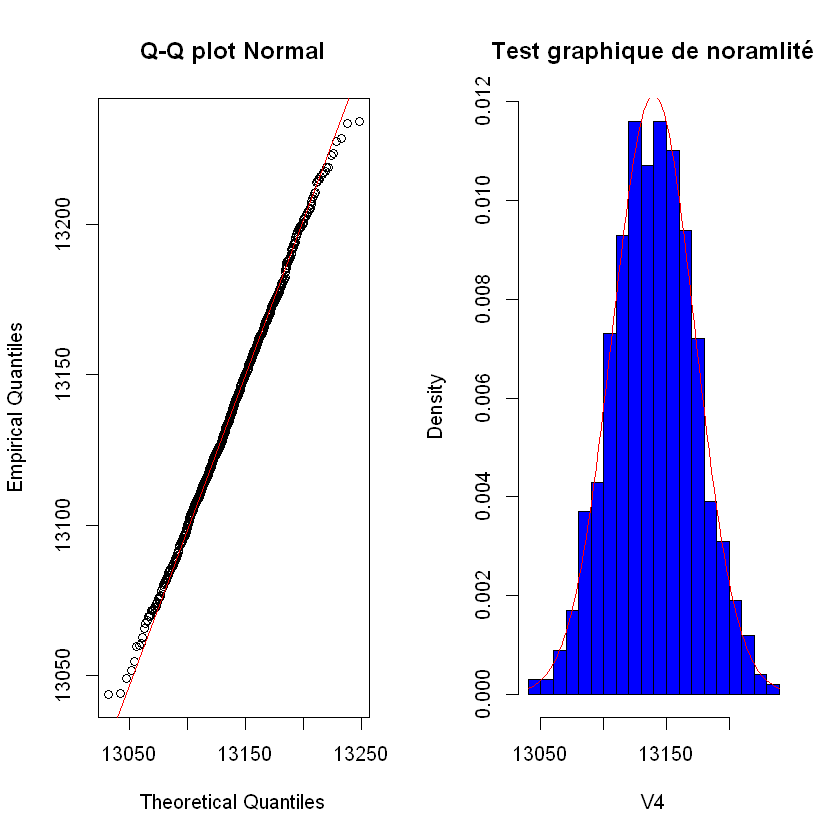

In [87]:
V4=data$V4
par(mfrow=c(1,2))
require(graphics)
#qqplot
dist= qnorm(ppoints(length(V4)), mean=mean(V4),sd=sd(V4))
qqplot(dist, V4, xlab = 'Theoretical Quantiles', ylab = 'Empirical Quantiles',
       main = 'Q-Q plot Normal')
qqline(V4, distribution = function(p) qnorm(p, mean=mean(V4),sd=sd(V4)),col=2)
# Superposition de l'histogramme et de la densité de loi normale
hist(V4,probability=T,col="blue",breaks=25,main="Test graphique de noramlité")
curve(dnorm(x,mean(V4),sd(V4)),col="red",add=T)
#Les tests théoriques d'adéquation
library(stats)
library(nortest)
Shapiro<-shapiro.test(V4)
ks<-ks.test(V4,"pnorm",mean=mean(V4), sd=sd(V4))
Anderson<-ad.test(V4)
print(Shapiro)
print(ks)
print(Anderson)
       
print("Mes tests implémentés:")
print("Test d'Anderson Darling")
print(Anderson_Darling(V4,alpha=0.05))
print("Test de Kolmogorov-Smirnov")
print(Kolmogorov_Smirnov(V4,alpha=0.05,cible="normal"))

On déduit que les données de V4 sont distribuées selon une loi normale de moyenne et d'écart-type les moyenne et écart-type empirique des données.

# f) Loi de la colonne V5

[1] "Tests existants dans R"

	Shapiro-Wilk normality test

data:  log.V5
W = 0.99848, p-value = 0.5433


	One-sample Kolmogorov-Smirnov test

data:  log.V5
D = 0.019077, p-value = 0.8599
alternative hypothesis: two-sided


	Anderson-Darling normality test

data:  log.V5
A = 0.35761, p-value = 0.4537

[1] "Mes tests implémentés:"
[1] "Test d'Anderson Darling"
$statistic
[1] 0.3576126

$p_value
[1] 0.453652

[1] "Test de Kolmogorov-Smirnov"
$statistic
[1] 0.01907723

$p_value
[1] 0.9658623

$d_alpha
[1] 0.03036807



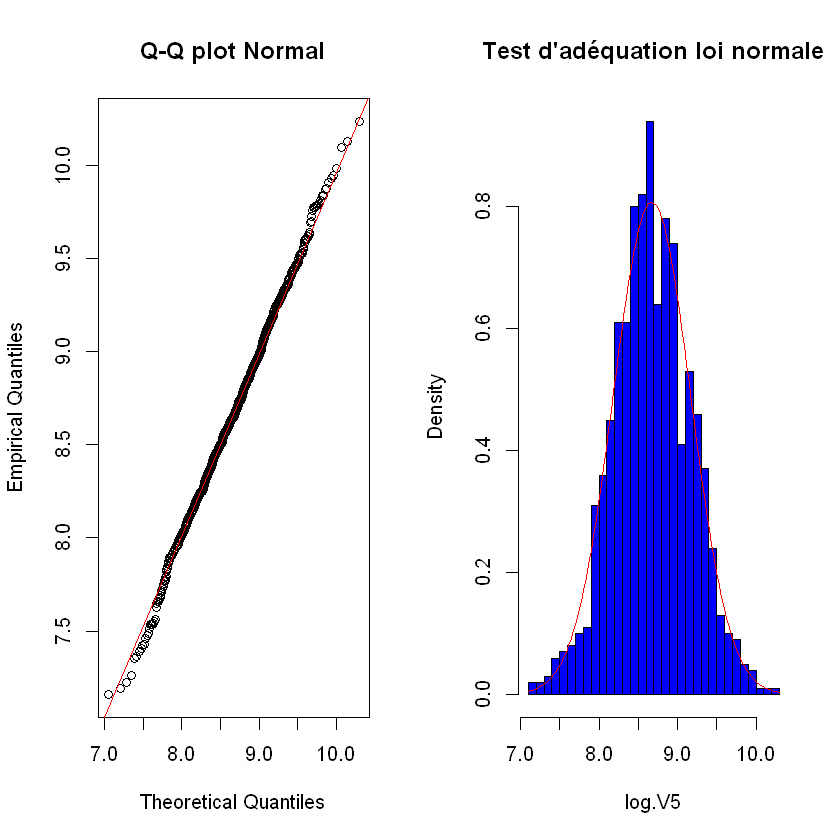

In [88]:

V5=data$V5
log.V5=log(V5)#Transformation de V5 en log(V5)
par(mfrow=c(1,2))
require(graphics)
#qqplot
dist= qnorm(ppoints(length(log.V5)), 
            mean=mean(log.V5),sd=sd(log.V5))
qqplot(dist, log.V5, xlab = 'Theoretical Quantiles', ylab = 'Empirical Quantiles',
       main = 'Q-Q plot Normal')
qqline(log.V5, distribution = function(p) qnorm(p, mean=mean(log.V5),sd= sd(log.V5)), col = 2)
#Superposition de l'histogramme et de la densité de loi normale
hist(log.V5,probability=T,col="blue",breaks=25,
     main="Test d'adéquation loi normale")
curve(dnorm(x,mean(log.V5),sd(log.V5)),col="red",add=T)
library(stats)
library(nortest)
Shapiro<-shapiro.test(log.V5)
ks<-ks.test(log.V5,"pnorm",mean=mean(log.V5), sd=sd(log.V5))
Anderson<-ad.test(log.V5)
print("Tests existants dans R")
print(Shapiro)
print(ks)
print(Anderson)
       
print("Mes tests implémentés:")
print("Test d'Anderson Darling")
print(Anderson_Darling(log.V5,alpha=0.05))
print("Test de Kolmogorov-Smirnov")
print(Kolmogorov_Smirnov(log.V5,alpha=0.05,cible="normal"))

Nous voyons que $log(V5)$ suit une loi normale donc V5 suit une loi log-normale

# g) Loi de la colonne V6


	One-sample Kolmogorov-Smirnov test

data:  V6
D = 0.028278, p-value = 0.4007
alternative hypothesis: two-sided

[1] "Mes tests réalisés:"
[1] "Test de Kolmogorov-Smirnov"
$statistic
[1] 0.02827849

$p_value
[1] 0.4040571

$d_alpha
[1] 0.03036807



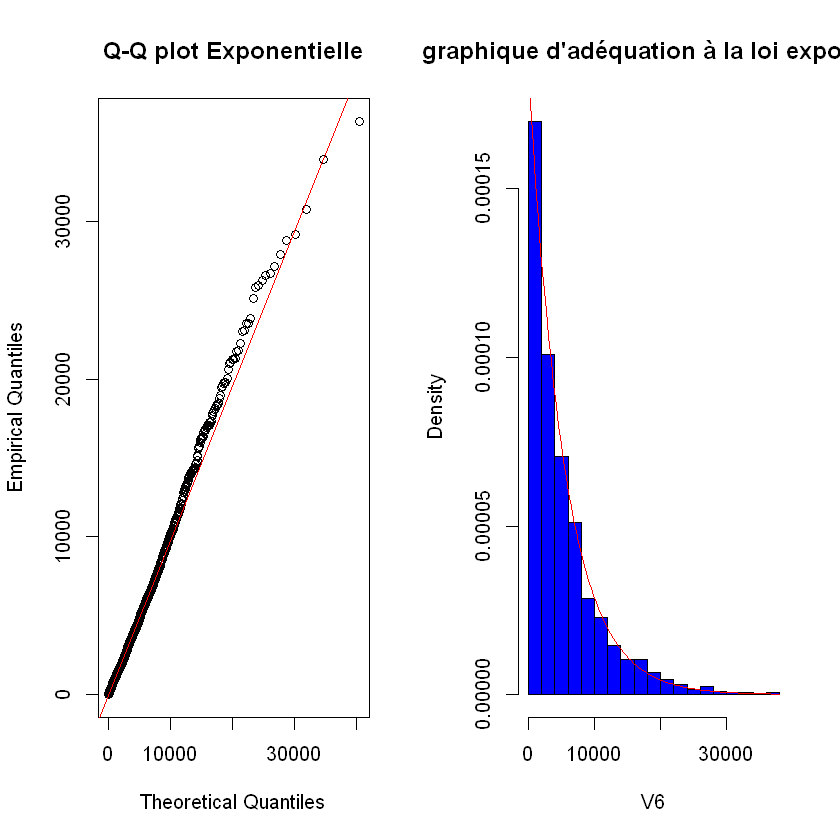

In [89]:
V6=data$V6
require(graphics)
par(mfrow=c(1,2))
#qqplot
dist= qexp(ppoints(length(V6)), rate = 1/mean(V6))
qqplot(dist, V6, xlab = 'Theoretical Quantiles', 
       ylab = 'Empirical Quantiles',
       main = 'Q-Q plot Exponentielle')
qqline(V6, distribution = function(p) qexp(p, rate = 1/mean(V6)),
       , col = 2)
#Superposition de densité et histogramme
hist(V6,probability=T,col="blue",breaks=25,
     main="Test graphique d'adéquation à la loi exponentielle")
curve(dexp(x,1/mean(V6)),col="red",add=T)
ks<-ks.test(V6,"pexp",rate=1/mean(V6))
print(ks)
print("Mes tests réalisés:")
print("Test de Kolmogorov-Smirnov")
print(Kolmogorov_Smirnov(V6,alpha=0.05,cible="exponential"))

Les tests graphiques et le test de Kolmogorov-Smirnov nous permettent de conclure que les données de la colonne V6 suivent une loi exponentielle de paramètre l'inverse de la moyenne empirique des données.

# 2-) Construction des cartes de contrôle sur la moyenne, la variance et l'étendu pour les colonnes 7 à 106

# a-) Carte sur la moyenne et l'étendu (carte $\bar{X}$ et $R$)
***-Pour la carte $\bar{x}$:*** ligne centrale = $\bar{\bar{x}}$ ; $UCL=\bar{\bar{x}}+A_{2}\bar{R}$ et $LCL=\bar{\bar{x}}-A_{2}\bar{R}$  
***-Pour la carte R :*** ligne centrale = $\bar{R}$ ; $UCL=D_{4}\bar{R}$ et $LCL=D_{3}\bar{R}$  
Avec: $\bar{\bar{x}}=\sum_{i=1}^k \frac{\bar{x_i}}{k}$ où ${\bar{x_i}}$ est la moyenne de l'échantillon i parmi les k échantillons; $\bar{R}=\sum_{i=1}^k \frac{R_i}{k}$ où $R_i=x_{max}^{(i)}-x^{(i)}_{min}$ est l'étendu de l'échantillon i parmi les k échantillons.  
$D_{3}=1-\frac{3d3}{d2}, D_{4}=1+\frac{3d3}{d2}, A_{2}=\frac{3}{\sqrt{d_{2}n}}$ où $d_2$ et $d_3$ sont donnés par le package SixSigma pour n donné.

In [90]:
#install.packages("SixSigma")
library(SixSigma)
packageVersion("SixSigma")

[1] '0.9.52'

In [91]:
carte_Xbar_R<-function(data,colonne,y_lim=T){
    
    
    n=1000
    k=length(colonne)
    d2=ss.cc.getd2(n = n)
    d3=ss.cc.getd3(n = n)
    D3=1-(3*d3/d2)
    D4=1+(3*d3/d2)
    A2=3/(d2*sqrt(n))
    sample=1:k
    x_bar=apply(data[,colonne], 2, function(x) mean(x))
    x_bar_bar=mean(x_bar)
    R=apply(data[,colonne], 2, function(x) {max(x)-min(x)})
    R_bar=mean(R)
    #calcul des bornes
    x_UCL=x_bar_bar+A2*R_bar
    x_LCL=x_bar_bar-A2*R_bar
    R_UCL=D4*R_bar
    R_LCL=D3*R_bar
    par(mfrow=c(2,1))
    if (y_lim){
        plot(sample,x_bar,main="Carte X_bar", pch = 19,type="o",
             ylim=c(x_LCL,x_UCL))
        abline(h=x_bar_bar,col="green")
        abline(h=x_UCL,col="red")
        abline(h=x_LCL,col="red")
    
        plot(sample,R,main="Carte R",pch=19,type="o",
             ylim=c(min(R)-1,max(R)+1))
        abline(h=R_bar,col="green")
        abline(h=R_UCL,col="red")
        abline(h=R_LCL,col="red")
        
    }
    else{
        plot(sample,x_bar,main="Carte X_bar", pch = 19,type="o")
        abline(h=x_bar_bar,col="green")
        abline(h=x_UCL,col="red")
        abline(h=x_LCL,col="red")
        legend(par('usr')[1],par('usr')[4],
               c("x_bar","center line","bounds"),
               lty=1,xjust=0,lwd=2,col=c("black","green","red"))
            
        plot(sample,R,main="Carte R",pch=19,type="o")
        abline(h=R_bar,col="green")
        abline(h=R_UCL,col="red")
        abline(h=R_LCL,col="red")
        legend(par('usr')[1],par('usr')[4],
               c("R","center line","bounds"),lty=1,
               xjust=0,lwd=2,col=c("black","green","red"))

        
        
    }
    
    
    
}


On construit les cartes avec les colonnes 7 à 106.

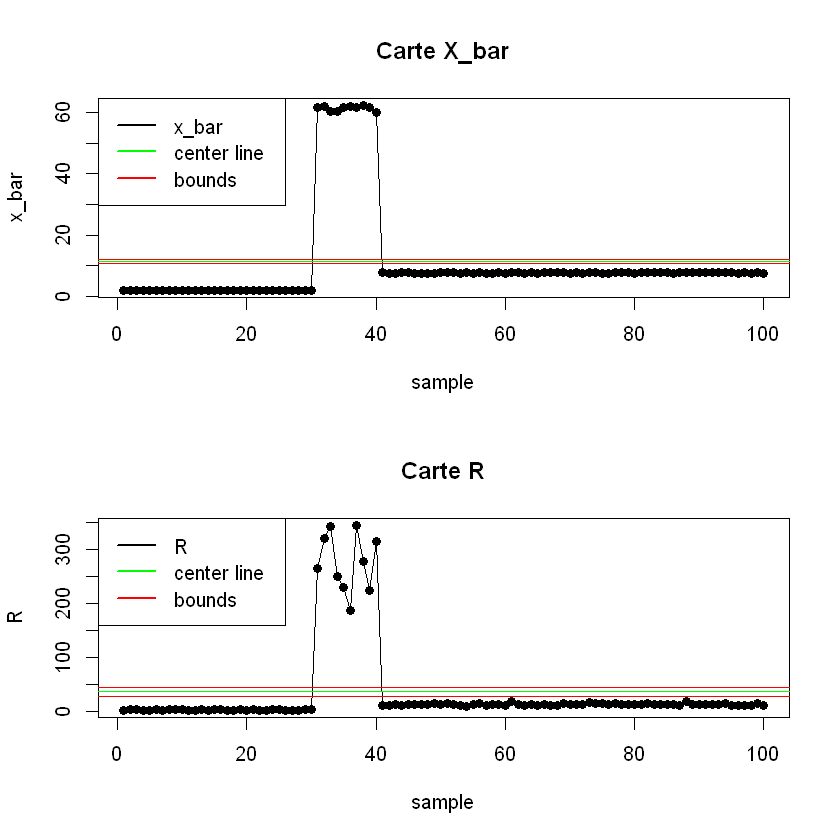

In [92]:
colonne=c()
for (i in 7:106){
        colonne=c(colonne,paste("V",i,sep = "", collapse = NULL))
  
}

carte_Xbar_R(data,colonne,y_lim=F)


**Analyse et interpretation:** Aucun point n'est dans la bonne zone (tous les points sont déréglés).Ce qui est compréhensible car il y a une très grande variance entre les échantillons.  
Ainsi j'ai decidé de spliter les échantillons en 3 sous-groupes d'échantilons et de construire les cartes $\bar{X}$ et $R$ pour chaque groupe. La formation des 3 sous-groupes se fera par la mise ensemble des échantillons (colonnes) qui ont des moyennes proches.

In [93]:
#Visualisation des moyennes des colonnes en vue de former les 3 sous groupes
x_bar=apply(data[,colonne], 2, function(x) mean(x))
x_bar



V7        V8        V9       V10       V11       V12       V13       V14 
 1.976898  2.005044  2.010336  1.988654  2.022598  2.020113  1.989828  1.994881 
      V15       V16       V17       V18       V19       V20       V21       V22 
 1.972455  1.999918  1.976232  2.011474  1.981673  2.030332  2.001692  2.003492 
      V23       V24       V25       V26       V27       V28       V29       V30 
 2.002031  2.004246  1.996891  1.982560  1.980020  1.990755  2.005781  1.992647 
      V31       V32       V33       V34       V35       V36       V37       V38 
 2.013260  1.976392  2.001678  2.016615  1.996108  2.023309 61.701946 62.089603 
      V39       V40       V41       V42       V43       V44       V45       V46 
60.389164 60.405139 61.827761 62.062181 61.656451 62.305670 61.860615 60.171830 
      V47       V48       V49       V50       V51       V52       V53       V54 
 7.633081  7.567718  7.565618  7.682432  7.615743  7.593499  7.579194  7.583600 
      V55       V56       V57       V58       V59       V60       V61       V62 
 7.553984  7.635648  7.653405  7.700963  7.576259  7.649784  7.602179  7.713253 
      V63       V64       V65       V66       V67       V68       V69       V70 
 7.537884  7.591337  7.658378  7.582184  7.711353  7.754052  7.532155  7.623181 
      V71       V72       V73       V74       V75       V76       V77       V78 
 7.587843  7.630213  7.693953  7.626879  7.625146  7.544005  7.636343  7.565438 
      V79       V80       V81       V82       V83       V84       V85       V86 
 7.662152  7.618392  7.592355  7.605440  7.695909  7.608141  7.668043  7.593429 
      V87       V88       V89       V90       V91       V92       V93       V94 
 7.776322  7.651147  7.617299  7.635955  7.610111  7.579969  7.644177  7.809403 
      V95       V96       V97       V98       V99      V100      V101      V102 
 7.635032  7.657753  7.617070  7.666573  7.660436  7.768756  7.669749  7.557628 
     V103      V104      V105      V106 
 7.749317  7.548715  7.631516  7.593509

In [94]:
colonne1=colonne[1:30]
colonne2=colonne[31:40]
colonne3=colonne[41:length(colonne)]


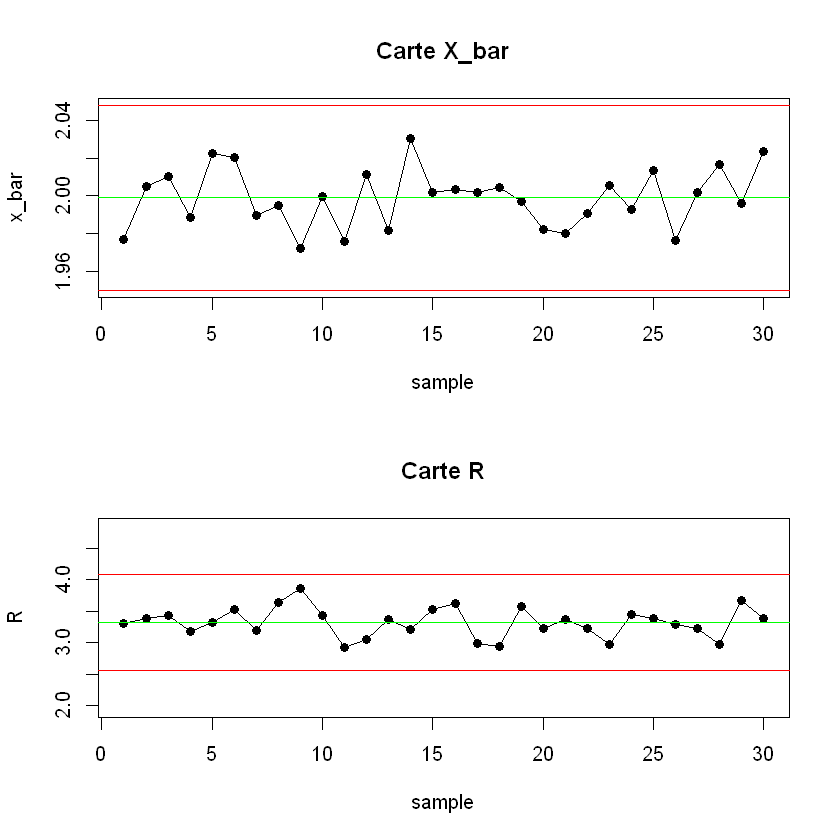

In [95]:
#Construction des cartes X_bar et R pour le 1er sous-groupe
carte_Xbar_R(data,colonne1)

**Analyse**:Pour ce sous-groupe (colonnes V7 à V36),tous les points sont dans les limites de contrôle pour les cartes $\bar{X}$ et R.

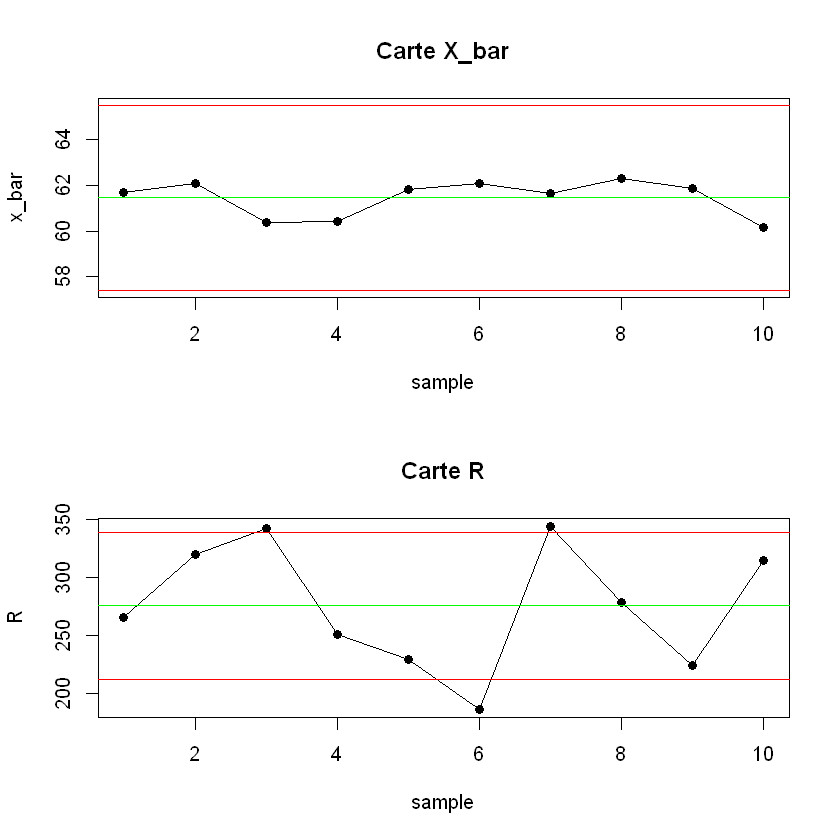

In [96]:
#Construction des cartes X_bar et R pour le 2nd sous-groupe
carte_Xbar_R(data,colonne2,y_lim=T)

**Analyse**:Pour ce sous-groupe (colonnes V37 à V46),tous les points sont dans les limites de contrôle pour la carte $\bar{X}$ tandis qu'il y a un déréglage au $3^{ème}, 6^{ème}$ et $7^{ème}$ échantillon pour la carte R.

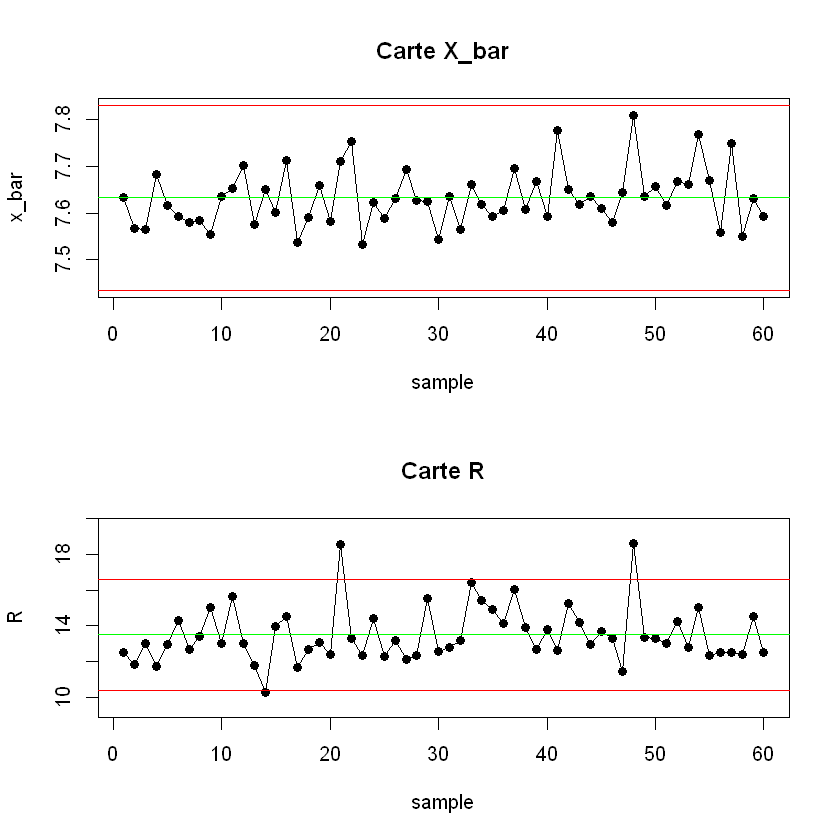

In [97]:
#Construction des cartes X_bar et R pour le 3ème sous-groupe
carte_Xbar_R(data,colonne3,y_lim=T)

**Analyse**:Pour ce sous-groupe (colonnes V47 à V106),tous les points sont dans les limites de contrôle pour la carte $\bar{X}$ tandis qu'il y a un déréglage au $14^{ème}, 21^{ème}$ et $49^{ème}$ échantillon pour la carte R.

# b-) Carte sur la moyenne et la variance (carte $\bar{X}$ et $s$)
***-Pour la carte s:*** ligne centrale = $\bar{s}$ avec $\bar{s}=\sum_{i=1}^k \frac{s_i}{k}$ où $\sqrt{s_{i}=\frac{1}{n-1}\sum_{i=1}^n (x_{i}-\bar{x})^2}$ est l'écart-type empirique de l'échantillon i parmi les k échantillons; $LCL=B_{3}\bar{s}$ ; $UCL=B_{4}\bar{s}$ avec pour $c_{4}=\frac{4(n-1)}{4n-3}$ , $B_{3}=1-\frac{3}{c_{4}\sqrt{2(n-1)}}$ , $B_{4}=1+\frac{3}{c_{4}\sqrt{2(n-1)}}$  
***-Pour la carte $\bar{x}$:*** ligne centrale = $\bar{\bar{x}}$ ; $LCL=\bar{\bar{x}}-A_{3}\bar{s}$ ; $UCL=\bar{\bar{x}}+A_{3}\bar{s}$ avec $A_{3}=\frac{3}{c_{4}\sqrt{n}}$

In [98]:
carte_Xbar_s<-function(data,colonne,y_lim=T){
    n=1000
    k=length(colonne)
    c4=4*(n-1)/(4*n-3)
    B3=1-3/(c4*sqrt(2*(n-1)))
    B4=1+3/(c4*sqrt(2*(n-1)))
    A3=3/(c4*sqrt(n))
    x_bar=apply(data[,colonne], 2, function(x) mean(x))
    x_bar_bar=mean(x_bar)
    s=apply(data[,colonne], 2, function(x) sd(x))
    s_bar=mean(s)
    #calcul des bornes
    x_LCL=x_bar_bar-A3*s_bar
    x_UCL=x_bar_bar+A3*s_bar
    s_LCL=B3*s_bar
    s_UCL=B4*s_bar
    sample=1:k
            
    if(y_lim){
        par(mfrow=c(2,1))
        plot(sample,x_bar,main="Carte X_bar", pch = 19,type="o",ylim=c(x_LCL,x_UCL))
        abline(h=x_bar_bar,col="green")
        abline(h=x_UCL,col="red")
        abline(h=x_LCL,col="red")
        
        plot(sample,s,main="Carte s",pch=19,type="o",ylim=c(s_LCL,s_UCL))
        abline(h=s_bar,col="green")
        abline(h=s_UCL,col="red")
        abline(h=s_LCL,col="red")
        
        
        
        
    }
    else{
        
        par(mfrow=c(2,1))
        plot(sample,x_bar,main="Carte X_bar", pch = 19,type="o")
        abline(h=x_bar_bar,col="green")
        abline(h=x_UCL,col="red")
        abline(h=x_LCL,col="red")
        legend(par('usr')[1],par('usr')[4],c("x_bar","center line","bounds"),
               lty=1,xjust=0,lwd=2,col=c("black","green","red"))
            
        plot(sample,s,main="Carte s",pch=19,type="o")
        abline(h=s_bar,col="green")
        abline(h=s_UCL,col="red")
        abline(h=s_LCL,col="red")
        legend(par('usr')[1],par('usr')[4],c("s","center line","bounds"),
               lty=1,xjust=0,lwd=2,col=c("black","green","red"))
        
    }

    

    
}


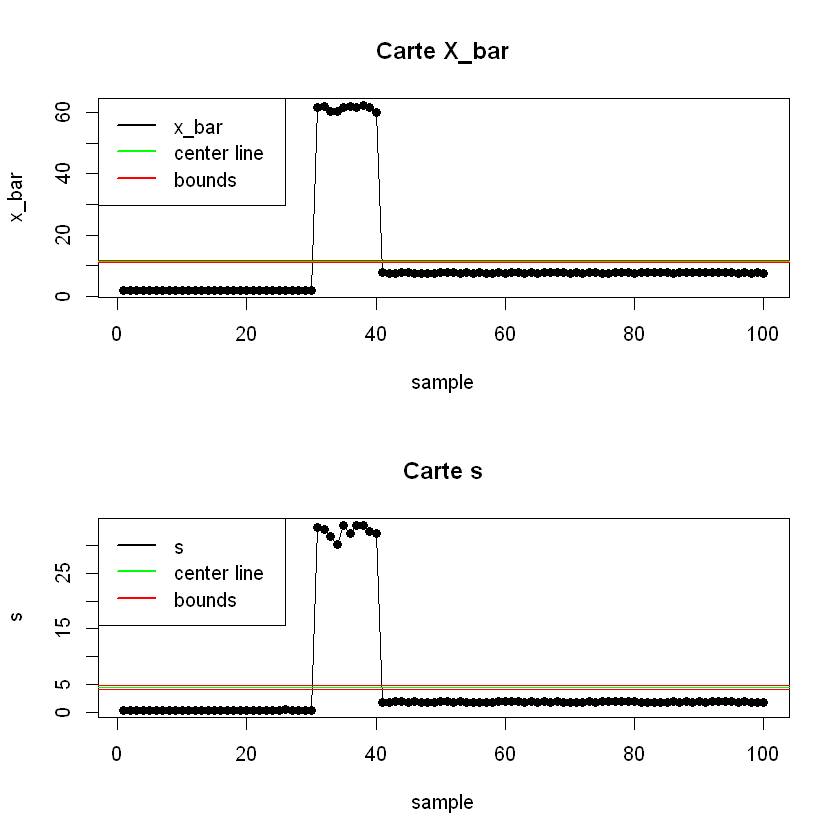

In [99]:
#Construction de la carte X_bar et s pour toutes les colonnes (V7 à 106)
carte_Xbar_s(data,colonne,y_lim=F)

**Analyse et interpretation:** Aucun point n'est dans la bonne zone (tous les points sont déréglés) et cela s'explique par la forte variance entre les échantillons.Comme précédemment, j'ai décidé de spliter les colonnes en 3 sous-groupe et construire les cartes $\bar{X}$ et $s$ pour chaque sous groupe.

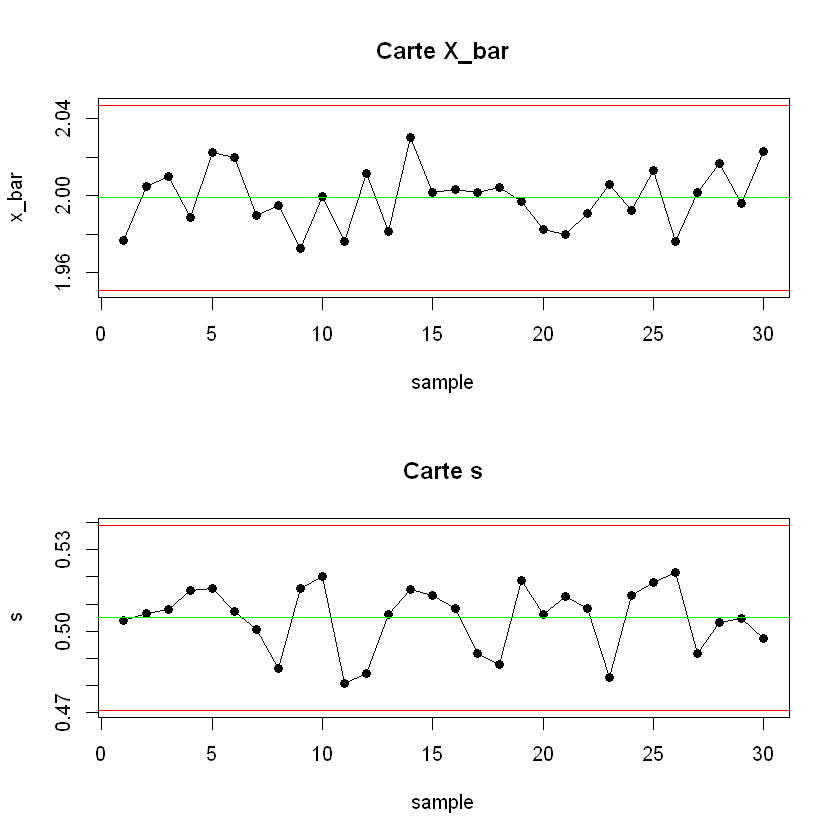

In [100]:
#Construction de la carte X_bar et s pour le 1er sous-groupe:colonnes V7 à V36
carte_Xbar_s(data,colonne1,y_lim=T)

**Analyse**: Pour ce sous-groupe,aucun point n'est en dehors des limites de contrôle pour les 2 cartes.

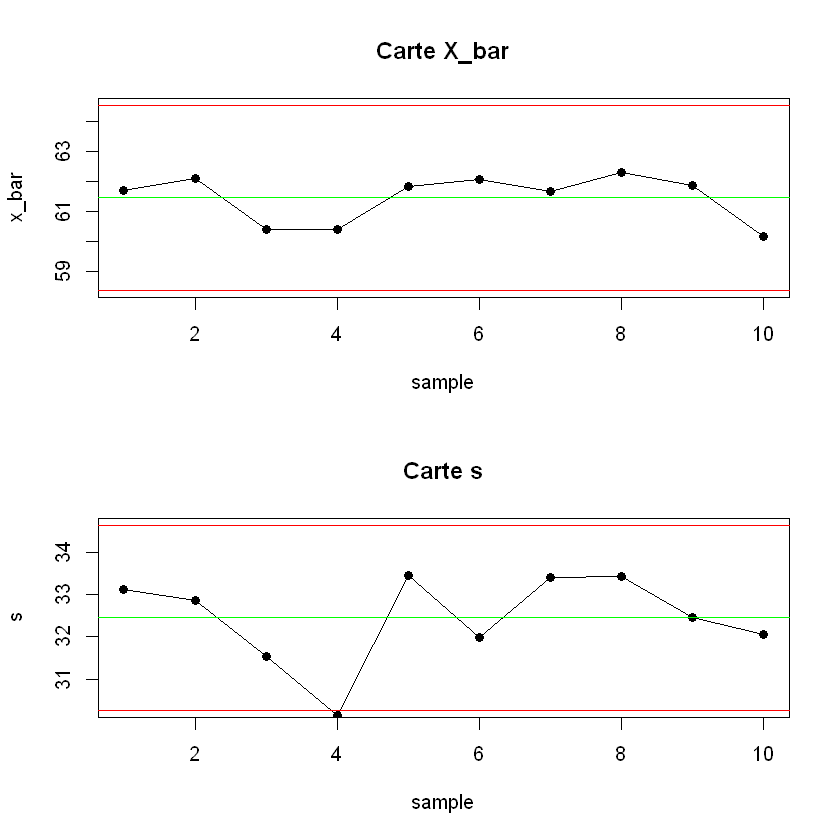

In [101]:
#Construction des cartes X_bar et s pour le 2nd sous-groupe:V37 à 46
carte_Xbar_s(data,colonne2,y_lim=T)

**Analyse**: Pour ce sous-groupe, tous les points sont dans les limites de contrôle pour la carte $\bar{X}$ tandis que la carte $s$ signale un déréglage au $4^{ème}$ échantillon.

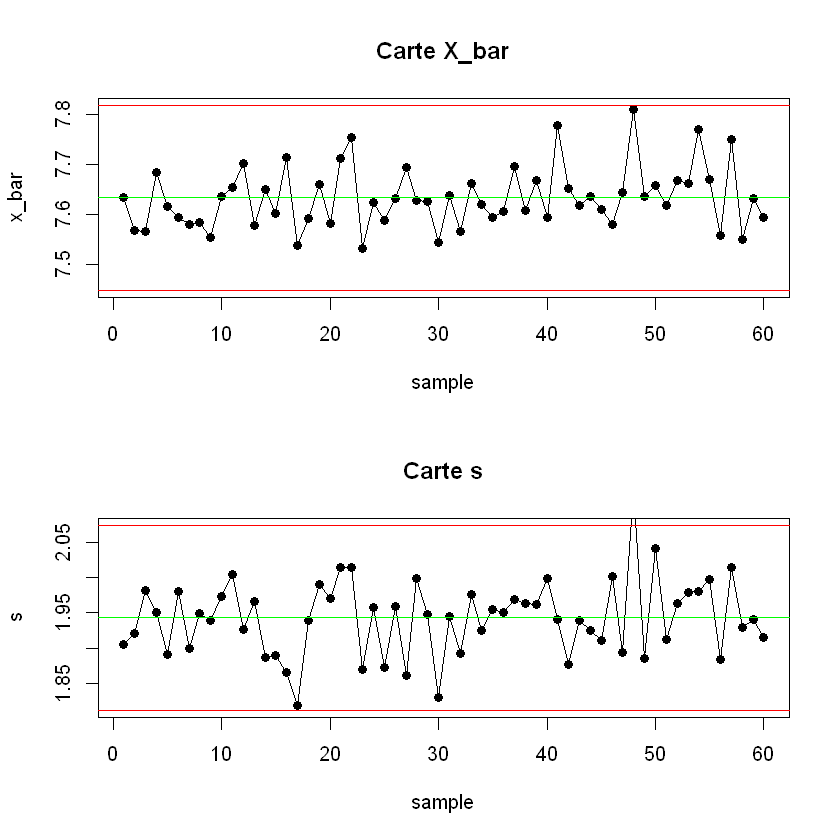

In [102]:
#Construction des cartes X_bar et s pour le 3ème sous-groupe:colonnes V47 à V106
carte_Xbar_s(data,colonne3,y_lim=T)

**Analyse**: Pour ce sous-groupe, aucun point n'est en dehors des limites de contrôle pour la carte $\bar{X}$ tandis que la carte $s$ détecte un déréglage au $49^{ème}$ échantillon.

# 3-) Construction des cartes CUSUM et EWMA pour chaque colonne 107 et 108 pour détecter un changement par rapport à une moyenne égale à 2.

In [103]:
#Selection des colonnes 107 et 108
V107=data$V107
V108=data$V108

# 3-1) CUSUM  
Nous allons constuire pour chaque colonne une carte CUSUM classique et une carte CUSUM standardisée  
**CUSUM classique:**  $C_{l}^{+}=max(0,x_{l}-(\mu_{0}+K)+C_{l-1}^{+})$ ; $C_{l}^{-}=max(0,(\mu_{0}-K)-x_{l}+C_{l-1}^{-})$ avec $C_{0}^{+}=C_{0}^{-}=0$ et $K=\frac{\delta \sigma_{0}}{2}$  
**CUSUM standardisée:**  $y_{l}=\frac{x{l}-\mu_0}{\sigma}$ ; $C_{l}^{+}=max(0,y_{l}-k+C_{l-1}^{+})$ ;  $C_{l}^{-}=max(0,k-y_{l}+C_{l-1}^{-})$  
$H=h\sigma$ ; $K=k\sigma$ avec $\sigma$ l'écart-type de l'échantillon. Le choix de $h=4$ ou $h=5$ et $k=\frac{1}{2}$ donne généralement une bonne propriété ARL à la carte CUSUM

In [110]:
CUSUM<-function(data,h=5,k=1/2,mu_0=2){
    
K=k*sd(data)
H=h*sd(data)
mu=mu_0 
Sample=1:length(data)
x=data
x_sd=(data-mu)/sd(data)
x_plus=x-(mu+K)
x_moins=(mu-K)-x
cl_plus_sd=rep(0,length(data))
cl_moins_sd=rep(0,length(data))
cl_plus=rep(0,length(data))
cl_moins=rep(0,length(data))
cl_plus_sd[1]=max(0,x_sd[1]-k)
cl_moins_sd[1]=max(0,-x_sd[1]-k)
cl_plus[1]=max(0,data[1]-mu_0-K)
cl_moins[1]=max(0,-data[1]+mu_0-K)
for(l in 2:length(data)){
    cl_plus[l]=max(0,x_plus[l]+cl_plus[l-1])
    cl_moins[l]=max(0,x_moins[l]+cl_moins[l-1])
    cl_plus_sd[l]=max(0,x_sd[l]-k+cl_plus_sd[l-1])
    cl_moins_sd[l]=max(0,k-x_sd[l]+cl_moins_sd[l-1])
    
}
par(mfrow=c(2,1))
plot(Sample,cl_plus,main="Carte CUSUM classique",type="o", pch = 19,
     col="blue",ylim=c(min(cl_moins),max(cl_plus)))
points(Sample,cl_moins,type="o",col="green")
abline(h=H,col="red")
abline(h=-H,col="red")
legend(par('usr')[1],par('usr')[4],c("C+","C-","H"),
       lty=1,xjust=0,lwd=2,col=c("blue","green","red"))

    
plot(Sample,cl_plus_sd,main="Carte CUSUM standardisée",
     type="o", pch = 19,col="blue",
     ylim=c(min(cl_moins_sd),max(cl_plus_sd)))
points(Sample,-cl_moins_sd,type="o",col="green")
abline(h=h,col="red")
abline(h=-h,col="red")
legend(par('usr')[1],par('usr')[4],c("C+","C-","H"),
       lty=1,xjust=0,lwd=2,col=c("blue","green","red"))

    
}

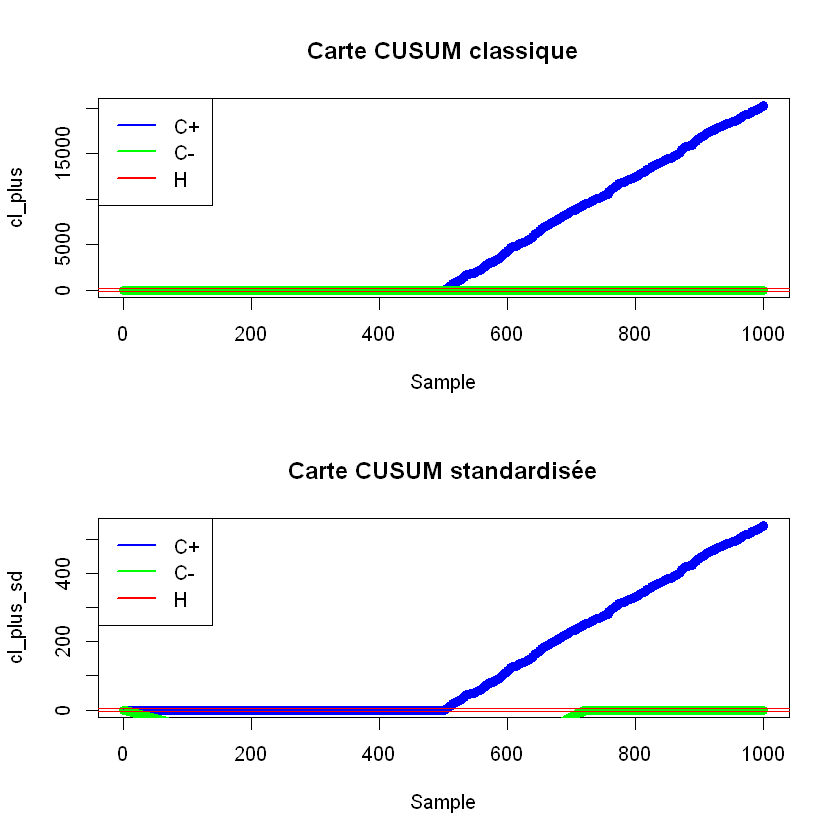

In [111]:
#CUSUM pour la colonne 107
CUSUM(V107,h=5,k=1/2,mu_0=2)

   **Ananlyse**: Pour toutes les deux cartes il y'a un déréclage à partir du $500^{ième}$ point.

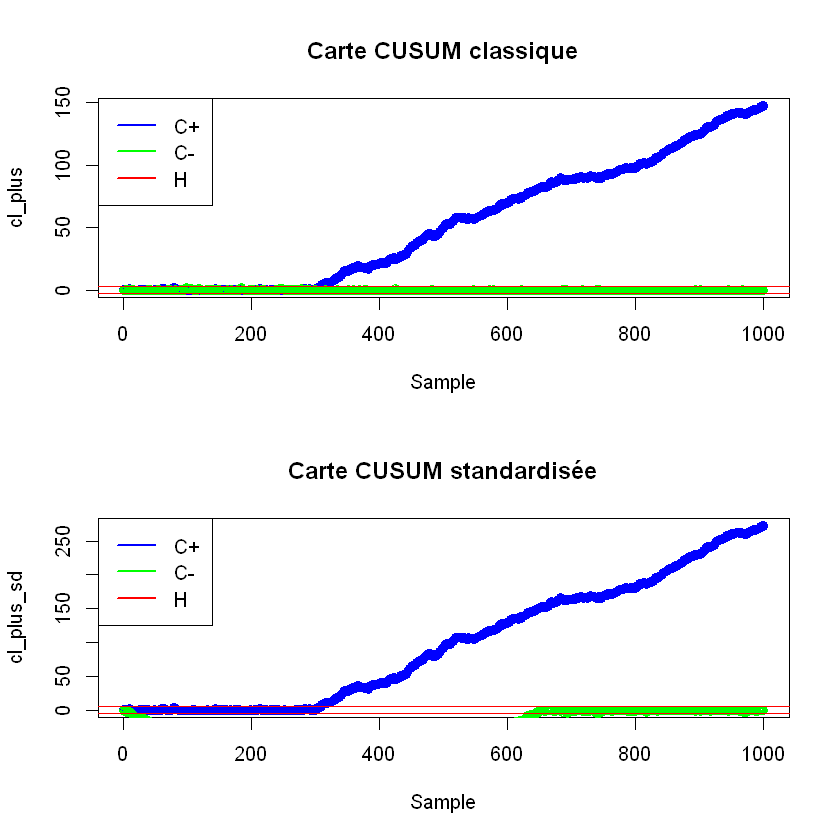

In [112]:
#CUSUM pour la colonne 108
CUSUM(V108,h=5,k=1/2,mu_0=2)

**Analyse**:Le déréclage apparaît à partir du $300^{ième points}$ pour toutes les 2 cartes.

# 3-2) EWMA  
Statistique utilisée: $z_{i}=\lambda x_{i}+(1-\lambda)z_{i-1}$ avec $z_{0}=\mu_{0}$  
Les bornes de la carte:Ligne centrale $=\mu_0$ ; $UCL=\mu_{0}+L\sigma \sqrt{(\frac{\lambda}{2-\lambda})(1-(1-\lambda)^{2i})}$ ;  $LCL=\mu_{0}-L\sigma \sqrt{(\frac{\lambda}{2-\lambda})(1-(1-\lambda)^{2i})}$

In [113]:
EWMA<-function(data,lambda=0.1,L=3,mu_0,y_lim=F){
    
sigma=sd(data)
z=rep(0,length(data))
z[1]=mu_0
x<-data
Sample<-1:length(data)
for(i in 2:length(data)){
    
    z[i]=lambda*x[i]+(1-lambda)*z[i-1]
    #z[i]=(1-(1-lambda)^(i))*x[i]+(1-lambda)^(i)*z[1]
}
UCL=rep(0,length(data))
LCL=rep(0,length(data))
for (i in 1:length(data)){
    UCL[i]=mu_0+L*sigma*sqrt((lambda/(2-lambda))*(1-(1-lambda)^(2*i)))
    LCL[i]=mu_0-L*sigma*sqrt((lambda/(2-lambda))*(1-(1-lambda)^(2*i)))
    
}
if(y_lim){
    plot(Sample,z,main="Carte EWMA", pch = 19,ylim=c(min(LCL),max(z)))
    lines(Sample,z,col="blue")
    abline(h=mu_0,col="green")
    lines(Sample,UCL,col="red")
    lines(Sample,LCL,col="red")
    legend(par('usr')[1],par('usr')[4],c("z","Center line","UCL","LCL"),
           lty=1,xjust=0,lwd=2,col=c("blue","green","red","red"))
}
else{
    plot(Sample,z,main="Carte EWMA", pch = 19)
    plot(Sample,z,main="Carte EWMA", pch = 19)
    lines(Sample,z,col="blue")
    abline(h=mu_0,col="green")
    lines(Sample,UCL,col="red")
    lines(Sample,LCL,col="red")
    legend(par('usr')[1],par('usr')[4],c("z","Center line","UCL","LCL"),
           lty=1,xjust=0,lwd=2,col=c("blue","green","red","red"))
}


}

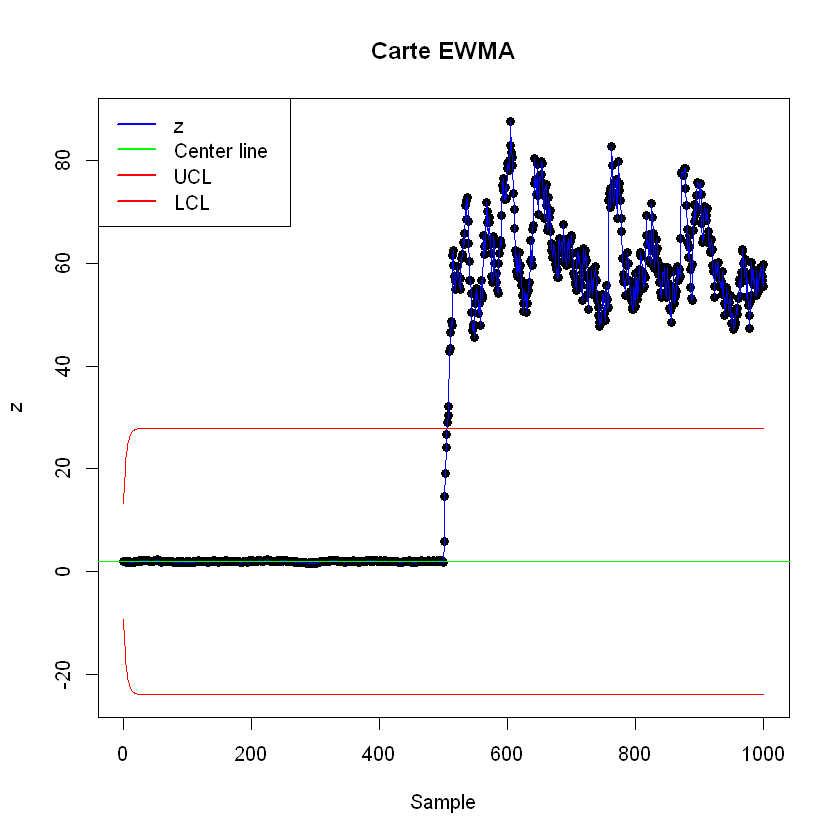

In [114]:
#EWMA colonne 107
EWMA(V107,lambda=0.1,L=3,mu_0=2,y_lim=T)

**Analyse**:Le déréglage se situe à partir du $500^{ième} point.$

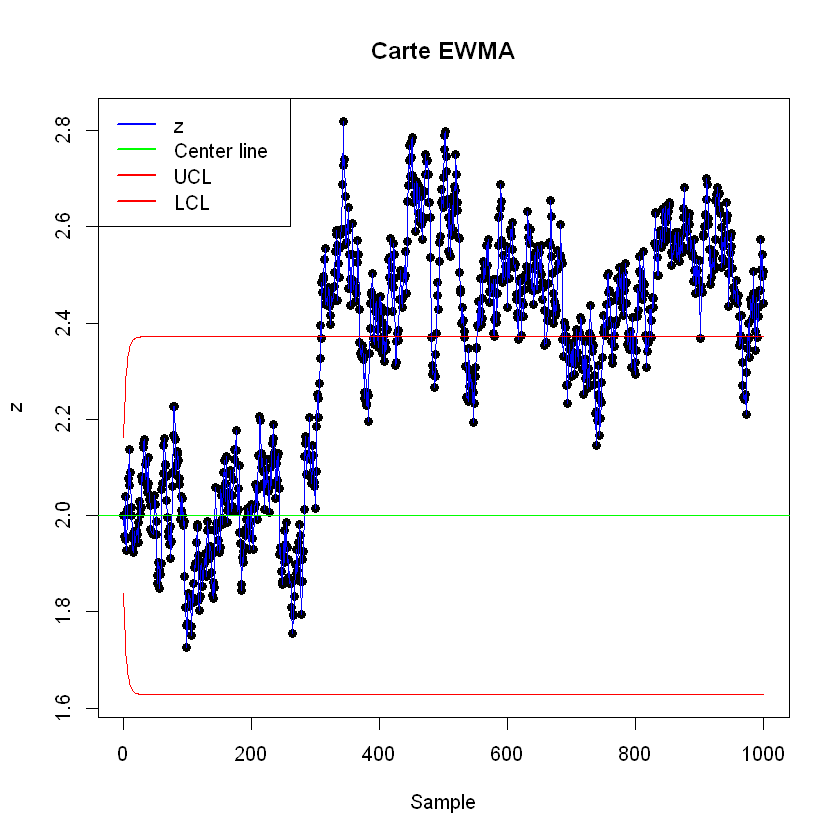

In [115]:
#EWMA colonne 108
EWMA(V108,lambda=0.1,L=3,mu_0=2,y_lim=T)

**Analyse**: il y'a un déréglage au $300^{ième}$ point.

**Conclusion carte CUSUM et EWMA**: On constate que ces deux types de carte détectent le déréglage au même instant.Ces deux cartes sont donc équivalentes au sens de l'éfficacité de détection.